In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np

import pymc as pm

from modules.models.chapter_3 import rate_estimation, rate_two_groups, joint_rate_trials
from modules.utils import validate_model, visualize_samples

ModuleNotFoundError: No module named 'pymc3'

In [8]:
PRPC_KWARGS={
    'samples': 1000
}
SAMPLING_KWARGS={
    'draws': 1000,
    'tune': 1000
}
POPC_KWARGS={
    'samples': 1000
}

# Rate Estimation

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 63 seconds.
The acceptance probability does not match the target. It is 0.8844820103223315, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


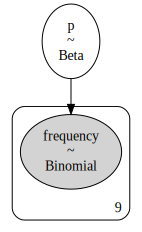

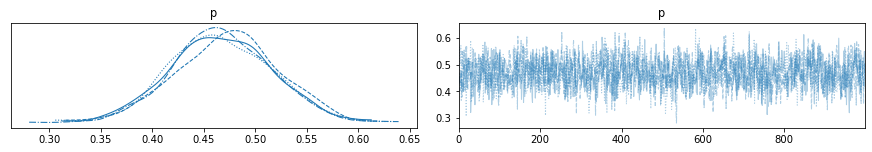

In [55]:
n = 10
obs_freq = np.array([10, 3, 2, 1, 10, 4, 5, 6, 1])

model = rate_estimation(
    obs_freq=obs_freq,
    n=n,
    alpha=5,
    beta=5
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

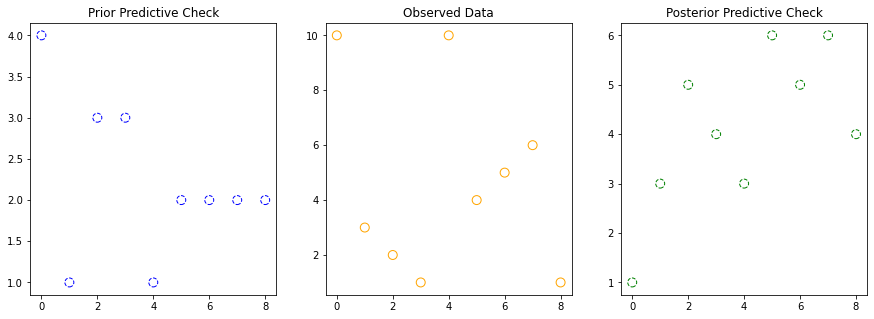

In [56]:
visualize_samples(
    observed=obs_freq, 
    prpc=prpc['frequency'][0, :], 
    popc=popc['frequency'][0, :]
)

# Rate Estimation Two Groups

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


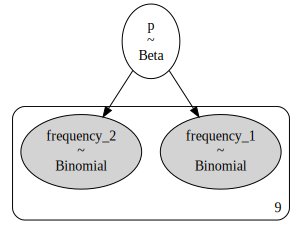

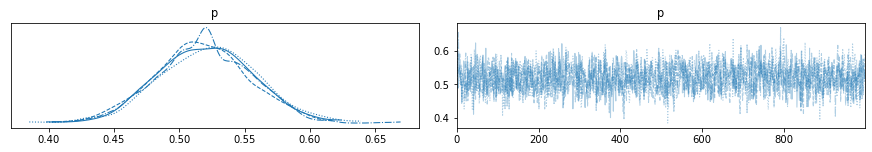

In [63]:
n = 10

obs_freq_1 = np.array([10, 9, 8, 8, 7, 8, 9, 7, 8])
obs_freq_2 = np.array([1, 2, 2, 3, 1, 3, 4, 2, 2])

model = rate_two_groups(
    obs_freq_1=obs_freq_1,
    obs_freq_2=obs_freq_2,
    n_1=n,
    n_2=n,
    shared=True,
    alpha=5,
    beta=5
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

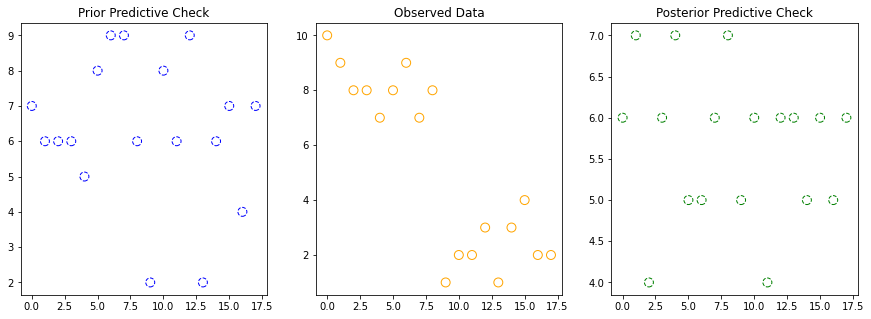

In [64]:
visualize_samples(
    observed=np.hstack([obs_freq_1, obs_freq_2]), 
    prpc=np.hstack([prpc['frequency_1'][0, :], prpc['frequency_2'][0, :]]), 
    popc=np.hstack([popc['frequency_1'][0, :], popc['frequency_2'][0, :]])
)

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_2, p_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


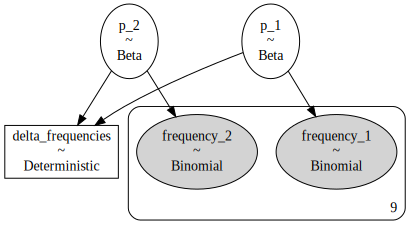

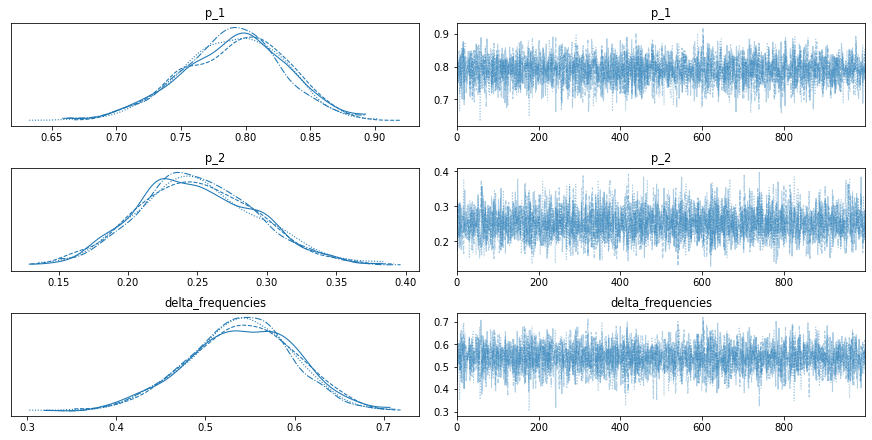

In [65]:
model = rate_two_groups(
    obs_freq_1=obs_freq_1,
    obs_freq_2=obs_freq_2,
    n_1=n,
    n_2=n,
    shared=False,
    alpha=5,
    beta=5
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

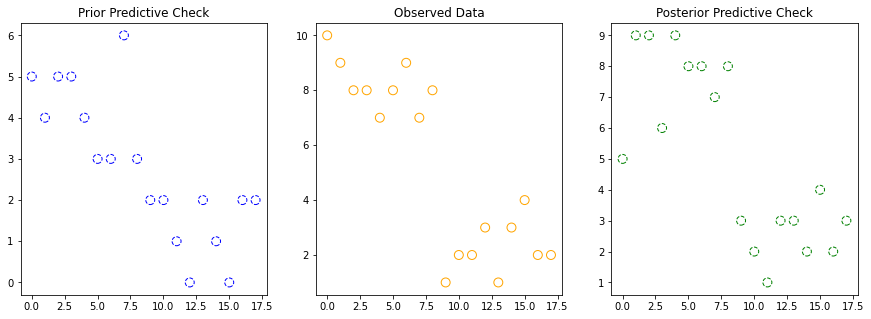

In [67]:
visualize_samples(
    observed=np.hstack([obs_freq_1, obs_freq_2]), 
    prpc=np.hstack([prpc['frequency_1'][0, :], prpc['frequency_2'][0, :]]), 
    popc=np.hstack([popc['frequency_1'][0, :], popc['frequency_2'][0, :]])
)

# Joint Estimation Rate N Trials

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p]
>CategoricalGibbsMetropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 65 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


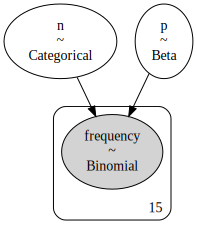

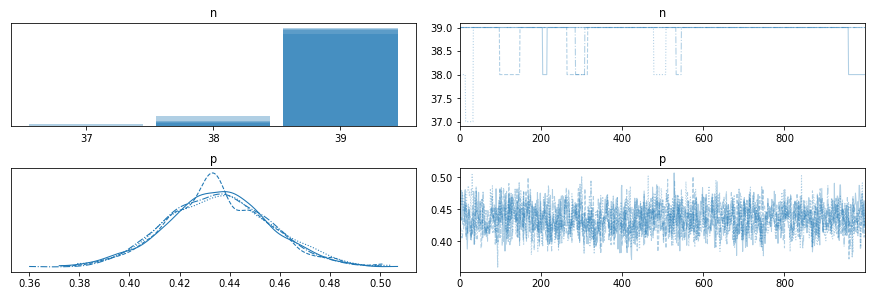

In [72]:
max_trials = 40
obs_freq = np.array([12, 12, 8, 4, 34, 21, 27, 1, 18, 11, 34, 29, 12, 11, 19])

model = joint_rate_trials(
    obs_freq=obs_freq,
    max_trials=max_trials,
    alpha=5,
    beta=5
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

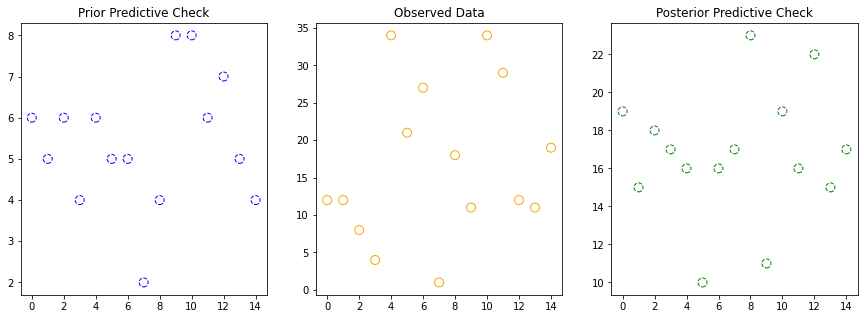

In [73]:
visualize_samples(
    observed=obs_freq, 
    prpc=prpc['frequency'][0, :], 
    popc=popc['frequency'][0, :]
)